<a href="https://colab.research.google.com/github/ShashwatVv/naiveDL/blob/main/Inverse_of_a_parabola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

$y^2 = x$

We need to plot this parabola

In [70]:
N= 200
x = np.random.random(N)

In [79]:
sign_list= (-np.ones(N,))**np.random.randint(2, size=N)
Y = np.sqrt(x)*sign_list ##element wise multiplication oftwo numpy arrays

In [72]:
##keras architecture with 3 hidden layers

act = tf.keras.layers.ReLU()

nn_sv = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(10, activation=act, input_shape=(1, )),
        tf.keras.layers.Dense(10, activation=act),

        tf.keras.layers.Dense(1, activation='linear')
    ]
)

In [73]:
##loss function 

loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)

In [74]:
## Now  training

results_sv = nn_sv.fit(x, Y, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5048
Epoch 2/5
40/40 [==============================] - 0s 1ms/step - loss: 0.4923
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.4883
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.4867
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 0.4859


In [75]:
pred = nn_sv.predict(x)

Text(0.5, 1.0, 'Using standard approach')

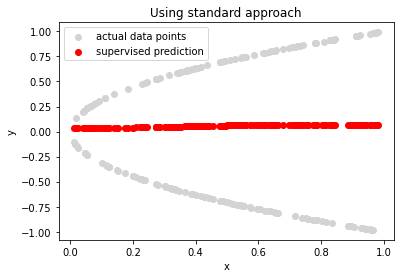

In [80]:
plt.scatter(x, Y, label = 'actual data points', color='lightgray')
plt.scatter(x, pred, label='supervised prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Using standard approach')

Differential Physics based

In [90]:
model_dp = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
        tf.keras.layers.Dense(10, activation=act),
        tf.keras.layers.Dense(1, activation='linear')
     
    ]
)

In [82]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError()

In [91]:
def loss_dp(ytrue, ypred):
  return mse(ytrue, ypred**2)
  

In [92]:
model_dp.compile(optimizer=optimizer, loss=loss_dp)

In [93]:
result_dp = model_dp.fit(x, x, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0993
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0017


In [94]:
pred_dp = model_dp.predict(x)

Text(0.5, 1.0, 'Using differential physics approach')

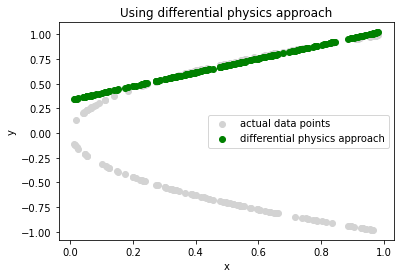

In [96]:
plt.scatter(x, Y, label = 'actual data points', color='lightgray')
plt.scatter(x, pred_dp, label='differential physics approach', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Using differential physics approach')